# 프로젝트: 한국어 데이터로 챗봇 만들기
==========================================================================================

## 목차
>### 1. 데이터 불러오기
>### 2. 데이터 전처리
>### 3. 모델 구성하기
>### 4. 모델 학습하기
>### 5. 모델 평가하기
>### 6. 회고
>### 7. Reference
>### 8. 자기다짐 및 아쉬운 점
---

## 1. 데이터 불러오기

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

tf.random.set_seed(42)

In [2]:
file_path = './data/ChatbotData.csv'
data = pd.read_csv(file_path)

- 아래에서 사용할 모듈들을 불러왔습니다.
- 그리고 이번 프로젝트에서 사용할 챗봇 데이터셋을 불러왔습니다.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11823 entries, 0 to 11822
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Q       11823 non-null  object
 1   A       11823 non-null  object
 2   label   11823 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 277.2+ KB


In [4]:
data.head()

,Q,A,label
0,12시 땡!,하루가 또 가네요.,0
1,1지망 학교 떨어졌어,위로해 드립니다.,0
2,3박4일 놀러가고 싶다,여행은 언제나 좋죠.,0
3,3박4일 정도 놀러가고 싶다,여행은 언제나 좋죠.,0
4,PPL 심하네,눈살이 찌푸려지죠.,0


- 데이터가 잘 불러와졌군요.
- 데이터는 Q(질문) 과 A(답변) 과 label(상황) 으로 구성되어 있습니다.

In [5]:
data.isna().sum()

Q        0
A        0
label    0
dtype: int64

- 결측치는 없군요.

In [6]:
data.label.unique()

array([0, 1, 2])

- label 은 0, 1, 2로 구성되어 있습니다.
- 각각 일상 0, 이별(부정) 1, 사랑(긍정) 2로 레이블링되어 있습니다.

In [7]:
data.loc[data['label']==0]

,Q,A,label
0,12시 땡!,하루가 또 가네요.,0
1,1지망 학교 떨어졌어,위로해 드립니다.,0
2,3박4일 놀러가고 싶다,여행은 언제나 좋죠.,0
3,3박4일 정도 놀러가고 싶다,여행은 언제나 좋죠.,0
4,PPL 심하네,눈살이 찌푸려지죠.,0
...,...,...,...
5285,힘내야지,응원합니다!,0
5286,힘든 것 좀 끝났으면,다 지나갈 거예요.,0
5287,힘든 시기가 지나갔으면,다 지나갈 거예요.,0
5288,힘든 데도 날 도와준 사람,잊지말고 보답하세요.,0


In [8]:
data.loc[data['label']==1]

,Q,A,label
5290,1000일 만난 여자친구와 이별,더 오래 만날 사람 만날 거예요.,1
5291,10년 연애. 헤어졌습니다.,더 공허함이 크시겠네요.,1
5292,10년 연애사 되돌아보니 다 부질없네,더 좋은 사람 만나실 거예요.,1
5293,10년 연예의끝,더 마음이 허하겠어요.,1
5294,10년만나다 헤어지네,충분히 슬퍼하고 충분히 아파하다가 이겨내세요.,1
...,...,...,...
8855,힘듭니다.,어떤 말도 위로가 되지 않겠지만 힘내세요.,1
8856,힘이 될런지 모르겠지만,어떤 말도 위로가 되지 않겠지만 힘내세요.,1
8857,힘이 드네,어떤 말도 위로가 되지 않겠지만 힘내세요.,1
8858,힘이 없어,힘내세요!,1


In [9]:
data.loc[data['label']==2]

,Q,A,label
8860,짝사랑만큼 고통스러운 건 없겠지.,짝사랑 만큼 감정소모가 큰 건 없을 거예요.,2
8861,1년 넘게 만났는데 지금도 불타올라,정열적인 사랑을 하고 있나봐요.,2
8862,1년 동거 중인데 계속 좋아,서로 깊게 알게되면서 더 좋아졌나봅니다.,2
8863,1년 동거하고 결혼했어,축하합니다!,2
8864,1년 만났는데도 그 사람에 대해 잘 모르겠어,더 만나보세요.,2
...,...,...,...
11818,훔쳐보는 것도 눈치 보임.,티가 나니까 눈치가 보이는 거죠!,2
11819,훔쳐보는 것도 눈치 보임.,훔쳐보는 거 티나나봐요.,2
11820,흑기사 해주는 짝남.,설렜겠어요.,2
11821,힘든 연애 좋은 연애라는게 무슨 차이일까?,잘 헤어질 수 있는 사이 여부인 거 같아요.,2


- 순서대로 정렬이 되어있는걸 확인할 수 있군요.
- 하지만 사랑 부정에 대한 키워드들이 무언가 애매한 모습을 보여줍니다.

---
## 2. 데이터 전처리

In [10]:
def preprocessing(sentence):
    #sentence = re.sub(r"([?.!,])", r" \1 ", sentence)
    #sentence = re.sub(r"[~]+", " ", sentence)
    sentence = re.sub(r"[^ㄱ-ㅎㅏ-ㅣ가-힣0-9 !?.,]+", r"", sentence)
    #sentence = sentence.strip()
    
    return sentence

- 데이터 전처리 함수를 만들어 주었습니다.
- 이번엔 아주 간단하게 한글과 숫자, !?., 를 제외한 문자들을 제거해주었습니다.

In [11]:
from tqdm import tqdm
import re

Q_list = []
A_list = []

for sentence in tqdm(data['Q']):
    Q_list.append(preprocessing(sentence))
for sentence in tqdm(data['A']):
    A_list.append(preprocessing(sentence))    

100%|██████████| 11823/11823 [00:00<00:00, 553927.55it/s]


- 진행 상황을 볼 수 있도록 tqdm을 불러왔고 정규표현식을 사용할 수 있도록 re도 불러왔습니다.

In [12]:
Q_list[:10]

['12시 땡!',
 '1지망 학교 떨어졌어',
 '3박4일 놀러가고 싶다',
 '3박4일 정도 놀러가고 싶다',
 ' 심하네',
 '카드 망가졌어',
 '카드 안돼',
 ' 맞팔 왜 안하지ㅠㅠ',
 ' 시간낭비인 거 아는데 매일 하는 중',
 ' 시간낭비인데 자꾸 보게됨']

In [13]:
A_list[:10]

['하루가 또 가네요.',
 '위로해 드립니다.',
 '여행은 언제나 좋죠.',
 '여행은 언제나 좋죠.',
 '눈살이 찌푸려지죠.',
 '다시 새로 사는 게 마음 편해요.',
 '다시 새로 사는 게 마음 편해요.',
 '잘 모르고 있을 수도 있어요.',
 '시간을 정하고 해보세요.',
 '시간을 정하고 해보세요.']

- 전처리가 잘 된것같군요.

In [14]:
data.isna().sum()

Q        0
A        0
label    0
dtype: int64

- 결측치도 생기지 않았습니다.

In [15]:
data['Q'] = Q_list
data['A'] = A_list

- 원본 데이터에 붙여넣어 주도록 하겠습니다.

In [16]:
import tensorflow_datasets as tfds

# 질문과 답변 데이터셋에 대해서 Vocabulary 생성
tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(data['Q'] + data['A'], target_vocab_size=2**13)

- LMS에서 사용하라고 했던 SubwordTextEncoder를 사용하였습니다.

#### SubwordTextEncoder란?

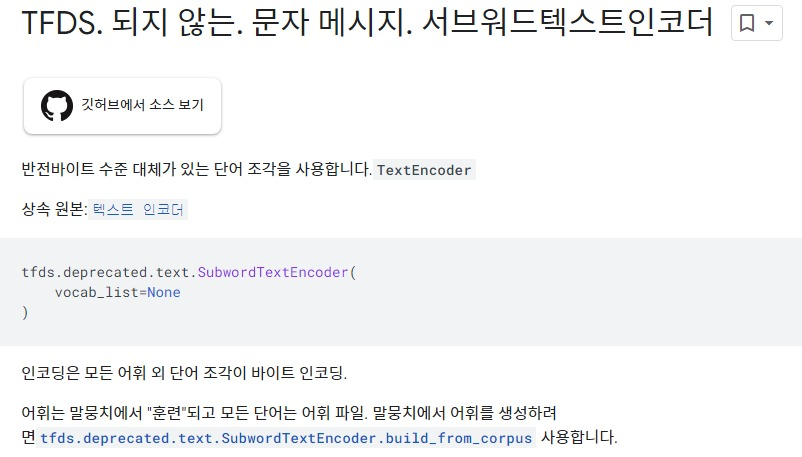

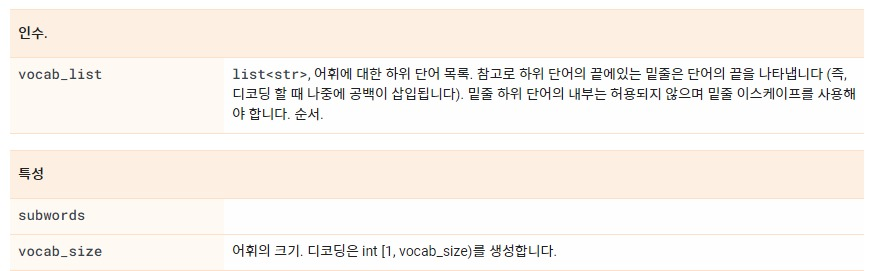

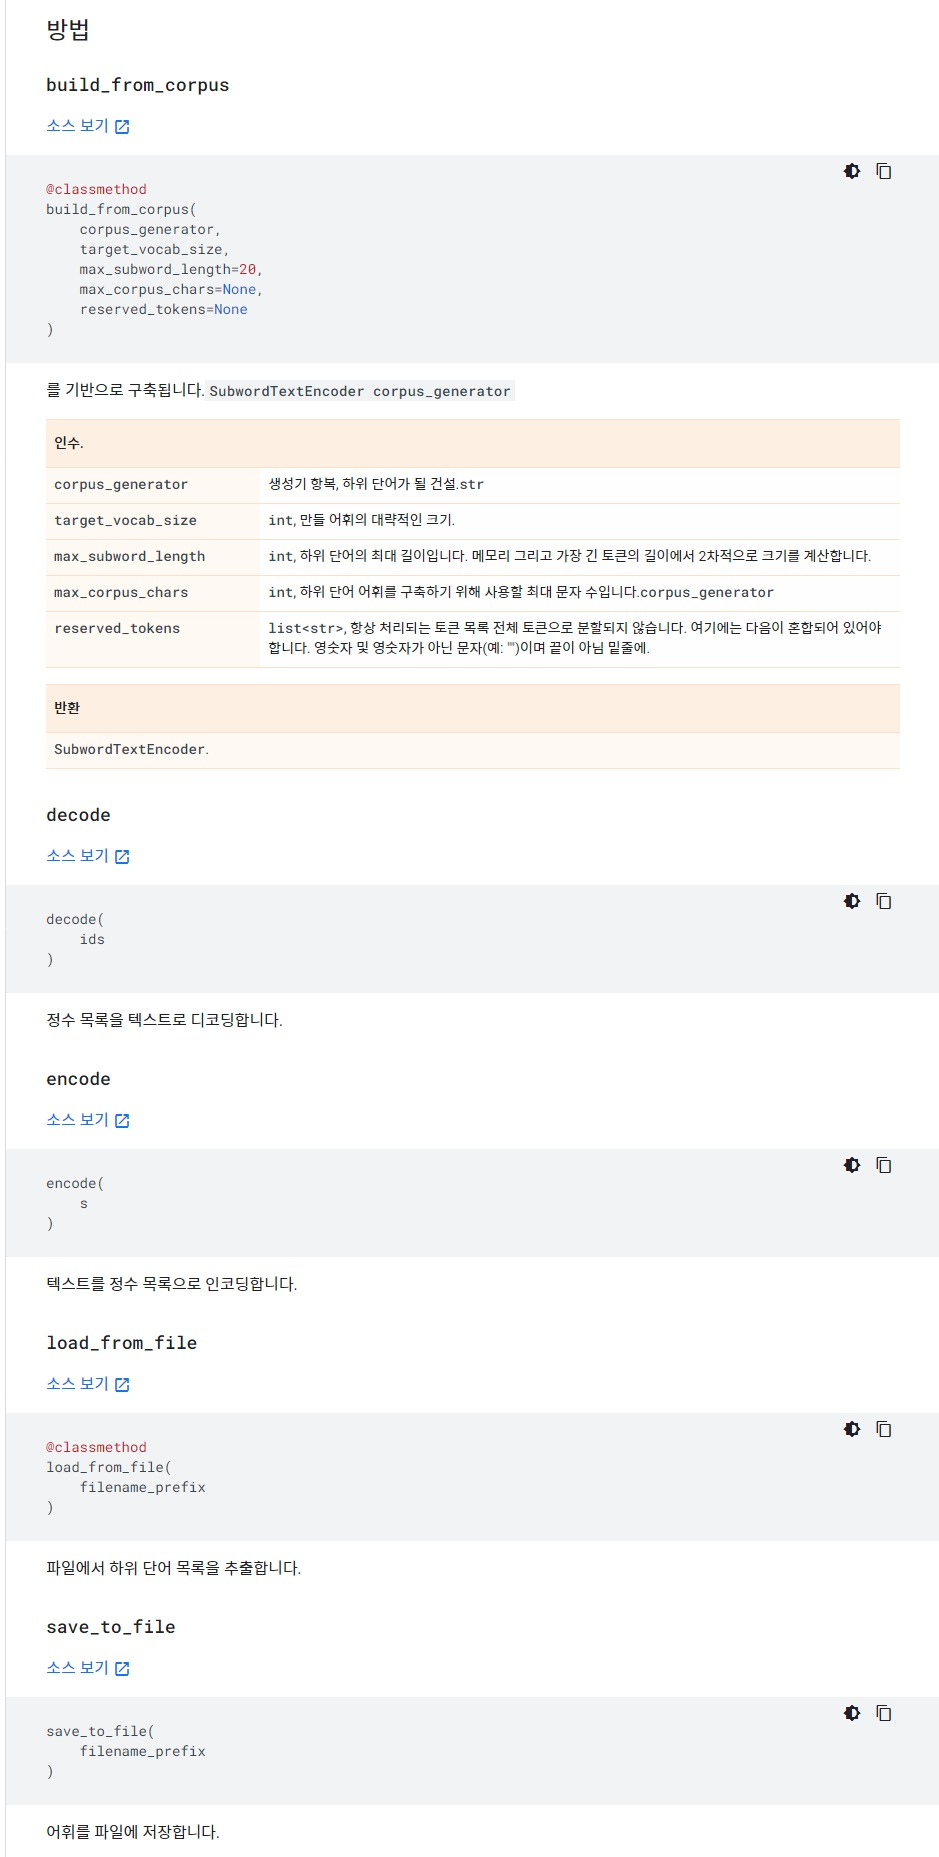

- 각 단어들을 토큰화 해주는 패키지입니다.
- Tokenizer와 엇비슷한 느낌을 보여줍니다.

In [17]:
# 시작 토큰과 종료 토큰에 고유한 정수를 부여합니다.
START_TOKEN, END_TOKEN = [tokenizer.vocab_size], [tokenizer.vocab_size + 1]

In [18]:
print('START_TOKEN의 번호 :' ,[tokenizer.vocab_size])
print('END_TOKEN의 번호 :' ,[tokenizer.vocab_size + 1])

START_TOKEN의 번호 : [8352]
END_TOKEN의 번호 : [8353]


- start 토큰과 end 토큰을 만들어주었습니다.
- 각각 끝번호 2개로 설정하였습니다.

In [19]:
# 시작 토큰과 종료 토큰을 고려하여 +2를 하여 단어장의 크기를 산정합니다.
VOCAB_SIZE = tokenizer.vocab_size + 2
print(VOCAB_SIZE)

8354


- vocab_size는 시작 종료토큰이 추가된 것을 고려하여 +2를 사용해 만들어주었습니다.

In [20]:
# 임의의 22번째 샘플에 대해서 정수 인코딩 작업을 수행.
# 각 토큰을 고유한 정수로 변환
print('정수 인코딩 후의 3300번째 질문 샘플: {}'.format(tokenizer.encode(data['Q'][3300])))
print('정수 인코딩 후의 3300번째 답변 샘플: {}'.format(tokenizer.encode(data['A'][3300])))

정수 인코딩 후의 3300번째 질문 샘플: [71, 450, 6137]
정수 인코딩 후의 3300번째 답변 샘플: [676, 384, 8142]


In [21]:
print('정수 디코딩 후의 3300번째 질문 샘플: {}'.format(tokenizer.decode([74, 454, 6149])))
print('정수 디코딩 후의 3300번째 답변 샘플: {}'.format(tokenizer.decode([680, 389, 1])))

정수 디코딩 후의 3300번째 질문 샘플: 같이 딱 최저
정수 디코딩 후의 3300번째 답변 샘플: 필요해요살고 거예요


- 토큰화가 잘 진행된것을 볼 수 있습니다.

---
## 3. 모델 구성하기

질문의 최소 길이 : 1
질문의 최대 길이 : 56
질문의 평균 길이 : 12.867630888945277
답변의 최소 길이 : 1
답변의 최대 길이 : 76
답변의 평균 길이 : 15.008880994671403


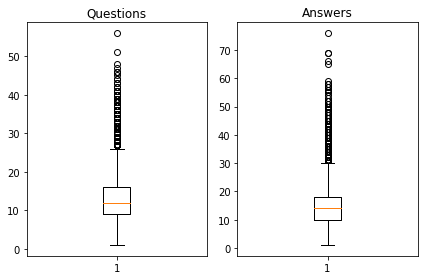

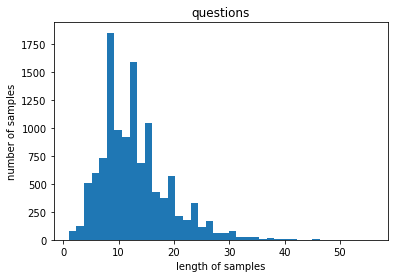

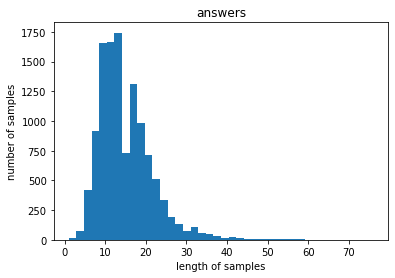

In [22]:
q_len = [len(s) for s in data['Q']]
a_len = [len(s) for s in data['A']]

print('질문의 최소 길이 : {}'.format(np.min(q_len)))
print('질문의 최대 길이 : {}'.format(np.max(q_len)))
print('질문의 평균 길이 : {}'.format(np.mean(q_len)))
print('답변의 최소 길이 : {}'.format(np.min(a_len)))
print('답변의 최대 길이 : {}'.format(np.max(a_len)))
print('답변의 평균 길이 : {}'.format(np.mean(a_len)))

plt.subplot(1,2,1)
plt.boxplot(q_len)
plt.title('Questions')
plt.subplot(1,2,2)
plt.boxplot(a_len)
plt.title('Answers')
plt.tight_layout()
plt.show()

plt.title('questions')
plt.hist(q_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

plt.title('answers')
plt.hist(a_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

- 평균 길이분포 그래프를 그려보았습니다.
- 질문은 5~20 사이, 답변 또한 5 ~ 25 사이에 가장 많이 분포하고있군요

In [23]:
# 샘플의 최대 허용 길이 또는 패딩 후의 최종 길이
MAX_LENGTH = 20

- 위에서 구한 분포를 토대로 임의의 길이값을 설정해주겠습니다.

In [24]:
# 정수 인코딩, 최대 길이를 초과하는 샘플 제거, 패딩
def tokenize_and_filter(inputs, outputs):
  tokenized_inputs, tokenized_outputs = [], []
  
  for (sentence1, sentence2) in zip(inputs, outputs):
    # 정수 인코딩 과정에서 시작 토큰과 종료 토큰을 추가
    sentence1 = START_TOKEN + tokenizer.encode(sentence1) + END_TOKEN
    sentence2 = START_TOKEN + tokenizer.encode(sentence2) + END_TOKEN

    # 최대 길이 20 이하인 경우에만 데이터셋으로 허용
    if len(sentence1) <= MAX_LENGTH and len(sentence2) <= MAX_LENGTH:
      tokenized_inputs.append(sentence1)
      tokenized_outputs.append(sentence2)
  
  # 최대 길이 20으로 모든 데이터셋을 패딩
  tokenized_inputs = tf.keras.preprocessing.sequence.pad_sequences(
      tokenized_inputs, maxlen=MAX_LENGTH, padding='post')
  tokenized_outputs = tf.keras.preprocessing.sequence.pad_sequences(
      tokenized_outputs, maxlen=MAX_LENGTH, padding='post')
  
  return tokenized_inputs, tokenized_outputs

- 위에서 구한 길이값을 토대로 길이 20을 넘는 데이터는 제거하고 모든 데이터의 길이를 패딩을 통해 20으로 통일시켜주었습니다.

In [25]:
questions, answers = tokenize_and_filter(data['Q'], data['A'])
print('단어장의 크기 :',(VOCAB_SIZE))
print('필터링 후의 질문 샘플 개수: {}'.format(len(questions)))
print('필터링 후의 답변 샘플 개수: {}'.format(len(answers)))

단어장의 크기 : 8354
필터링 후의 질문 샘플 개수: 11792
필터링 후의 답변 샘플 개수: 11792


- 필터링이 잘 되었군요.

In [26]:
BATCH_SIZE = 64
BUFFER_SIZE = len(questions)

# 디코더는 이전의 target을 다음의 input으로 사용합니다.
# 이에 따라 outputs에서는 START_TOKEN을 제거하겠습니다.
dataset = tf.data.Dataset.from_tensor_slices((
    {
        'inputs': questions,
        'dec_inputs': answers[:, :-1]
    },
    {
        'outputs': answers[:, 1:]
    },
))

dataset = dataset.cache()
dataset = dataset.shuffle(BUFFER_SIZE)
dataset = dataset.batch(BATCH_SIZE)
dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)

- 데이터셋을 섞어서 준비해 주겠습니다.

- 여기서부턴 트랜스포머 신경망층에 사용할 클래스와 함수들을 설정해 주겠습니다.

### 포지셔널 인코딩

In [27]:
# 포지셔널 인코딩 레이어
class PositionalEncoding(tf.keras.layers.Layer):

  def __init__(self, position, d_model):
    super(PositionalEncoding, self).__init__()
    self.pos_encoding = self.positional_encoding(position, d_model)

  def get_angles(self, position, i, d_model):
    angles = 1 / tf.pow(10000, (2 * (i // 2)) / tf.cast(d_model, tf.float32))
    return position * angles

  def positional_encoding(self, position, d_model):
    # 각도 배열 생성
    angle_rads = self.get_angles(
        position=tf.range(position, dtype=tf.float32)[:, tf.newaxis],
        i=tf.range(d_model, dtype=tf.float32)[tf.newaxis, :],
        d_model=d_model)

    # 배열의 짝수 인덱스에는 sin 함수 적용
    sines = tf.math.sin(angle_rads[:, 0::2])
    # 배열의 홀수 인덱스에는 cosine 함수 적용
    cosines = tf.math.cos(angle_rads[:, 1::2])

    # sin과 cosine이 교차되도록 재배열
    pos_encoding = tf.stack([sines, cosines], axis=0)
    pos_encoding = tf.transpose(pos_encoding,[1, 2, 0]) 
    pos_encoding = tf.reshape(pos_encoding, [position, d_model])

    pos_encoding = pos_encoding[tf.newaxis, ...]
    return tf.cast(pos_encoding, tf.float32)

  def call(self, inputs):
    return inputs + self.pos_encoding[:, :tf.shape(inputs)[1], :]

### 스케일드 닷 프로덕트 어텐션

In [28]:
# 스케일드 닷 프로덕트 어텐션 함수
def scaled_dot_product_attention(query, key, value, mask):
  # 어텐션 가중치는 Q와 K의 닷 프로덕트
  matmul_qk = tf.matmul(query, key, transpose_b=True)

  # 가중치를 정규화
  depth = tf.cast(tf.shape(key)[-1], tf.float32)
  logits = matmul_qk / tf.math.sqrt(depth)

  # 패딩에 마스크 추가
  if mask is not None:
    logits += (mask * -1e9)

  # softmax적용
  attention_weights = tf.nn.softmax(logits, axis=-1)

  # 최종 어텐션은 가중치와 V의 닷 프로덕트
  output = tf.matmul(attention_weights, value)
  return output

### 멀티헤드 어텐션

In [29]:
class MultiHeadAttention(tf.keras.layers.Layer):

  def __init__(self, d_model, num_heads, name="multi_head_attention"):
    super(MultiHeadAttention, self).__init__(name=name)
    self.num_heads = num_heads
    self.d_model = d_model

    assert d_model % self.num_heads == 0

    self.depth = d_model // self.num_heads

    self.query_dense = tf.keras.layers.Dense(units=d_model)
    self.key_dense = tf.keras.layers.Dense(units=d_model)
    self.value_dense = tf.keras.layers.Dense(units=d_model)

    self.dense = tf.keras.layers.Dense(units=d_model)

  def split_heads(self, inputs, batch_size):
    inputs = tf.reshape(
        inputs, shape=(batch_size, -1, self.num_heads, self.depth))
    return tf.transpose(inputs, perm=[0, 2, 1, 3])

  def call(self, inputs):
    query, key, value, mask = inputs['query'], inputs['key'], inputs[
        'value'], inputs['mask']
    batch_size = tf.shape(query)[0]

    # Q, K, V에 각각 Dense를 적용합니다
    query = self.query_dense(query)
    key = self.key_dense(key)
    value = self.value_dense(value)

    # 병렬 연산을 위한 머리를 여러 개 만듭니다
    query = self.split_heads(query, batch_size)
    key = self.split_heads(key, batch_size)
    value = self.split_heads(value, batch_size)

    # 스케일드 닷 프로덕트 어텐션 함수
    scaled_attention = scaled_dot_product_attention(query, key, value, mask)

    scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])

    # 어텐션 연산 후에 각 결과를 다시 연결(concatenate)합니다
    concat_attention = tf.reshape(scaled_attention,
                                  (batch_size, -1, self.d_model))

    # 최종 결과에도 Dense를 한 번 더 적용합니다
    outputs = self.dense(concat_attention)

    return outputs

### 마스킹

In [30]:
def create_padding_mask(x):
    mask = tf.cast(tf.math.equal(x, 0), tf.float32)
    # (batch_size, 1, 1, sequence length)
    return mask[:, tf.newaxis, tf.newaxis, :]

### 룩 어헤드 마스킹

In [31]:
def create_look_ahead_mask(x):
    seq_len = tf.shape(x)[1]
    look_ahead_mask = 1 - tf.linalg.band_part(tf.ones((seq_len, seq_len)), -1, 0)
    padding_mask = create_padding_mask(x)
    return tf.maximum(look_ahead_mask, padding_mask)

### 인코더층

In [32]:
# 인코더 하나의 레이어를 함수로 구현.
# 이 하나의 레이어 안에는 두 개의 서브 레이어가 존재합니다.
def encoder_layer(units, d_model, num_heads, dropout, name="encoder_layer"):
  inputs = tf.keras.Input(shape=(None, d_model), name="inputs")

  # 패딩 마스크 사용
  padding_mask = tf.keras.Input(shape=(1, 1, None), name="padding_mask")

  # 첫 번째 서브 레이어 : 멀티 헤드 어텐션 수행 (셀프 어텐션)
  attention = MultiHeadAttention(
      d_model, num_heads, name="attention")({
          'query': inputs,
          'key': inputs,
          'value': inputs,
          'mask': padding_mask
      })

  # 어텐션의 결과는 Dropout과 Layer Normalization이라는 훈련을 돕는 테크닉을 수행
  attention = tf.keras.layers.Dropout(rate=dropout)(attention)
  attention = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(inputs + attention)

  # 두 번째 서브 레이어 : 2개의 완전연결층
  outputs = tf.keras.layers.Dense(units=units, activation='gelu')(attention)
  #outputs = tf.keras.layers.Dense(units=units, activation='tanh')(attention)  
  outputs = tf.keras.layers.Dense(units=d_model)(outputs)

  # 완전연결층의 결과는 Dropout과 LayerNormalization이라는 훈련을 돕는 테크닉을 수행
  outputs = tf.keras.layers.Dropout(rate=dropout)(outputs)
  outputs = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(attention + outputs)

  return tf.keras.Model(
      inputs=[inputs, padding_mask], outputs=outputs, name=name)

In [33]:
def encoder(vocab_size,
            num_layers,
            units,
            d_model,
            num_heads,
            dropout,
            name="encoder"):
  inputs = tf.keras.Input(shape=(None,), name="inputs")

  # 패딩 마스크 사용
  padding_mask = tf.keras.Input(shape=(1, 1, None), name="padding_mask")

  # 임베딩 레이어
  embeddings = tf.keras.layers.Embedding(vocab_size, d_model)(inputs)
  embeddings *= tf.math.sqrt(tf.cast(d_model, tf.float32))

  # 포지셔널 인코딩
  embeddings = PositionalEncoding(vocab_size, d_model)(embeddings)

  outputs = tf.keras.layers.Dropout(rate=dropout)(embeddings)

  # num_layers만큼 쌓아올린 인코더의 층.
  for i in range(num_layers):
    outputs = encoder_layer(
        units=units,
        d_model=d_model,
        num_heads=num_heads,
        dropout=dropout,
        name="encoder_layer_{}".format(i),
    )([outputs, padding_mask])

  return tf.keras.Model(
      inputs=[inputs, padding_mask], outputs=outputs, name=name)

### 디코더층

In [34]:
# 디코더 하나의 레이어를 함수로 구현.
# 이 하나의 레이어 안에는 세 개의 서브 레이어가 존재합니다.
def decoder_layer(units, d_model, num_heads, dropout, name="decoder_layer"):
  inputs = tf.keras.Input(shape=(None, d_model), name="inputs")
  enc_outputs = tf.keras.Input(shape=(None, d_model), name="encoder_outputs")
  look_ahead_mask = tf.keras.Input(
      shape=(1, None, None), name="look_ahead_mask")
  padding_mask = tf.keras.Input(shape=(1, 1, None), name='padding_mask')

  # 첫 번째 서브 레이어 : 멀티 헤드 어텐션 수행 (셀프 어텐션)
  attention1 = MultiHeadAttention(
      d_model, num_heads, name="attention_1")(inputs={
          'query': inputs,
          'key': inputs,
          'value': inputs,
          'mask': look_ahead_mask
      })

  # 멀티 헤드 어텐션의 결과는 LayerNormalization이라는 훈련을 돕는 테크닉을 수행
  attention1 = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(attention1 + inputs)

  # 두 번째 서브 레이어 : 마스크드 멀티 헤드 어텐션 수행 (인코더-디코더 어텐션)
  attention2 = MultiHeadAttention(
      d_model, num_heads, name="attention_2")(inputs={
          'query': attention1,
          'key': enc_outputs,
          'value': enc_outputs,
          'mask': padding_mask
      })

  # 마스크드 멀티 헤드 어텐션의 결과는
  # Dropout과 LayerNormalization이라는 훈련을 돕는 테크닉을 수행
  attention2 = tf.keras.layers.Dropout(rate=dropout)(attention2)
  attention2 = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(attention2 + attention1)

  # 세 번째 서브 레이어 : 2개의 완전연결층
  outputs = tf.keras.layers.Dense(units=units, activation='gelu')(attention2)
  #outputs = tf.keras.layers.Dense(units=units, activation='tanh')(attention2)
  outputs = tf.keras.layers.Dense(units=d_model)(outputs)

  # 완전연결층의 결과는 Dropout과 LayerNormalization 수행
  outputs = tf.keras.layers.Dropout(rate=dropout)(outputs)
  outputs = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(outputs + attention2)

  return tf.keras.Model(
      inputs=[inputs, enc_outputs, look_ahead_mask, padding_mask],
      outputs=outputs,
      name=name)

In [35]:
def decoder(vocab_size,
            num_layers,
            units,
            d_model,
            num_heads,
            dropout,
            name='decoder'):
  inputs = tf.keras.Input(shape=(None,), name='inputs')
  enc_outputs = tf.keras.Input(shape=(None, d_model), name='encoder_outputs')
  look_ahead_mask = tf.keras.Input(
      shape=(1, None, None), name='look_ahead_mask')

  # 패딩 마스크
  padding_mask = tf.keras.Input(shape=(1, 1, None), name='padding_mask')
  
  # 임베딩 레이어
  embeddings = tf.keras.layers.Embedding(vocab_size, d_model)(inputs)
  embeddings *= tf.math.sqrt(tf.cast(d_model, tf.float32))

  # 포지셔널 인코딩
  embeddings = PositionalEncoding(vocab_size, d_model)(embeddings)

  # Dropout이라는 훈련을 돕는 테크닉을 수행
  outputs = tf.keras.layers.Dropout(rate=dropout)(embeddings)

  for i in range(num_layers):
    outputs = decoder_layer(
        units=units,
        d_model=d_model,
        num_heads=num_heads,
        dropout=dropout,
        name='decoder_layer_{}'.format(i),
    )(inputs=[outputs, enc_outputs, look_ahead_mask, padding_mask])

  return tf.keras.Model(
      inputs=[inputs, enc_outputs, look_ahead_mask, padding_mask],
      outputs=outputs,
      name=name)

### 트랜스포머 층

In [36]:
def transformer(vocab_size,
                num_layers,
                units,
                d_model,
                num_heads,
                dropout,
                name="transformer"):
  inputs = tf.keras.Input(shape=(None,), name="inputs")
  dec_inputs = tf.keras.Input(shape=(None,), name="dec_inputs")

  # 인코더에서 패딩을 위한 마스크
  enc_padding_mask = tf.keras.layers.Lambda(
      create_padding_mask, output_shape=(1, 1, None),
      name='enc_padding_mask')(inputs)

  # 디코더에서 미래의 토큰을 마스크 하기 위해서 사용합니다.
  # 내부적으로 패딩 마스크도 포함되어져 있습니다.
  look_ahead_mask = tf.keras.layers.Lambda(
      create_look_ahead_mask,
      output_shape=(1, None, None),
      name='look_ahead_mask')(dec_inputs)

  # 두 번째 어텐션 블록에서 인코더의 벡터들을 마스킹
  # 디코더에서 패딩을 위한 마스크
  dec_padding_mask = tf.keras.layers.Lambda(
      create_padding_mask, output_shape=(1, 1, None),
      name='dec_padding_mask')(inputs)

  # 인코더
  enc_outputs = encoder(
      vocab_size=vocab_size,
      num_layers=num_layers,
      units=units,
      d_model=d_model,
      num_heads=num_heads,
      dropout=dropout,
  )(inputs=[inputs, enc_padding_mask])

  # 디코더
  dec_outputs = decoder(
      vocab_size=vocab_size,
      num_layers=num_layers,
      units=units,
      d_model=d_model,
      num_heads=num_heads,
      dropout=dropout,
  )(inputs=[dec_inputs, enc_outputs, look_ahead_mask, dec_padding_mask])

  # 완전연결층
  outputs = tf.keras.layers.Dense(units=vocab_size, name="outputs")(dec_outputs)

  return tf.keras.Model(inputs=[inputs, dec_inputs], outputs=outputs, name=name)

In [37]:
# tf.keras.backend.clear_session()

# 하이퍼파라미터
NUM_LAYERS = 2 # 인코더와 디코더의 층의 개수
D_MODEL = 256 # 인코더와 디코더 내부의 입, 출력의 고정 차원
NUM_HEADS = 8 # 멀티 헤드 어텐션에서의 헤드 수 
UNITS = 512 # 피드 포워드 신경망의 은닉층의 크기
DROPOUT = 0.25 # 드롭아웃의 비율

model = transformer(
    vocab_size=VOCAB_SIZE,
    num_layers=NUM_LAYERS,
    units=UNITS,
    d_model=D_MODEL,
    num_heads=NUM_HEADS,
    dropout=DROPOUT)

model.summary()

Model: "transformer"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
inputs (InputLayer)             [(None, None)]       0                                            
__________________________________________________________________________________________________
dec_inputs (InputLayer)         [(None, None)]       0                                            
__________________________________________________________________________________________________
enc_padding_mask (Lambda)       (None, 1, 1, None)   0           inputs[0][0]                     
__________________________________________________________________________________________________
encoder (Functional)            (None, None, 256)    3192832     inputs[0][0]                     
                                                                 enc_padding_mask[0][0] 

- 하이퍼 파라미터들을 설정해 주었습니다.
- 약 900만개의 파라미터를 가진 신경망이 형성되었군요.

In [38]:
def loss_function(y_true, y_pred):
  y_true = tf.reshape(y_true, shape=(-1, MAX_LENGTH - 1))
  
  loss = tf.keras.losses.SparseCategoricalCrossentropy(
      from_logits=True, reduction='none')(y_true, y_pred)

  mask = tf.cast(tf.not_equal(y_true, 0), tf.float32)
  loss = tf.multiply(loss, mask)

  return tf.reduce_mean(loss)

In [39]:
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):

  def __init__(self, d_model, warmup_steps=4000):
    super(CustomSchedule, self).__init__()

    self.d_model = d_model
    self.d_model = tf.cast(self.d_model, tf.float32)

    self.warmup_steps = warmup_steps

  def __call__(self, step):
    arg1 = tf.math.rsqrt(step)
    arg2 = step * (self.warmup_steps**-1.5)

    return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)

In [40]:
def accuracy(y_true, y_pred):
  y_true = tf.reshape(y_true, shape=(-1, MAX_LENGTH - 1))
  return tf.keras.metrics.sparse_categorical_accuracy(y_true, y_pred)

- 각각 loss, accuracy, optimizing된 learning_rate 등을 구할 수 있는 함수를 만들어주었습니다.

In [41]:
learning_rate = CustomSchedule(D_MODEL)

optimizer = tf.keras.optimizers.Adam(
    learning_rate, beta_1=0.9, beta_2=0.98, epsilon=1e-9)

model.compile(optimizer=optimizer, loss=loss_function, metrics=[accuracy])

- 설정된 값을 통해 compile 해주었습니다.

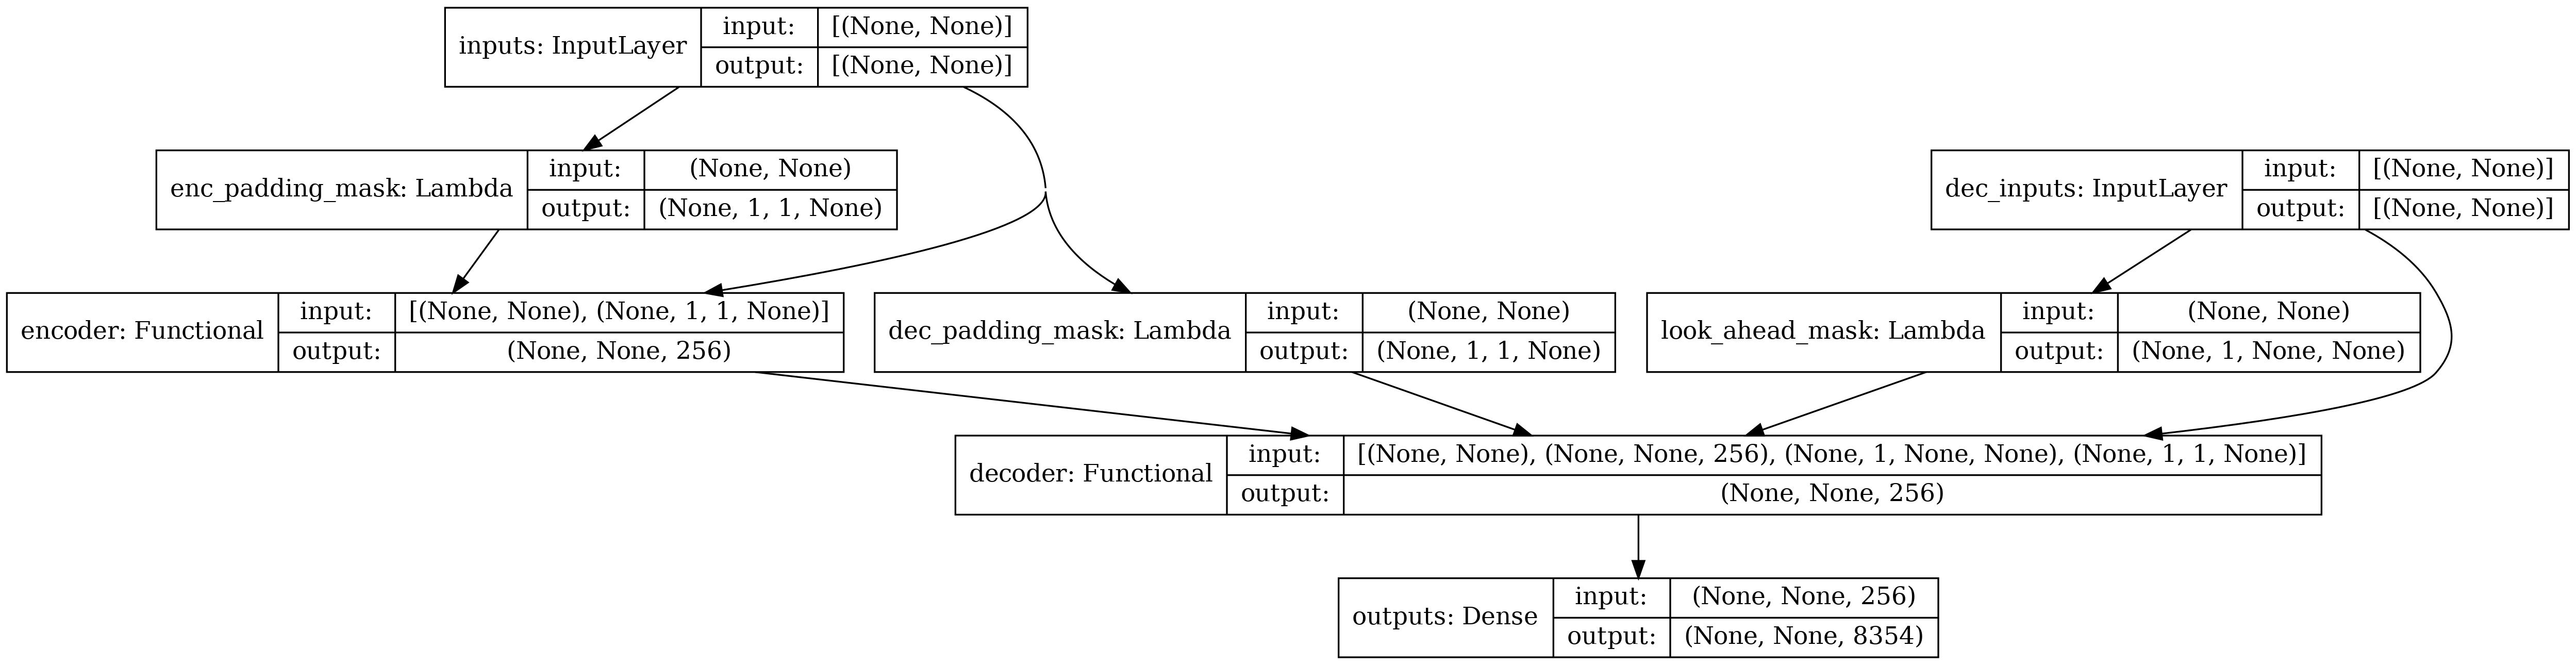

In [42]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True, dpi = 240)

- 신경망이 상당히 복잡하게 되어있군요. 
- 아직 여기까진 이해하기가 어려워 넘어가도록 하겠습니다.

---
## 4. 모델 학습하기

In [43]:
es = tf.keras.callbacks.EarlyStopping(patience=2, monitor='loss', verbose = 1)

EPOCHS = 500
history = model.fit(dataset, epochs=EPOCHS, verbose='auto', callbacks=[es])

Epoch 1/500
185/185 [==============================] - 14s 39ms/step - loss: 3.0046 - accuracy: 0.0438
Epoch 2/500
185/185 [==============================] - 7s 38ms/step - loss: 2.4414 - accuracy: 0.0965
Epoch 3/500
185/185 [==============================] - 7s 38ms/step - loss: 2.0921 - accuracy: 0.1028
Epoch 4/500
185/185 [==============================] - 7s 38ms/step - loss: 1.9470 - accuracy: 0.1075
Epoch 5/500
185/185 [==============================] - 7s 38ms/step - loss: 1.8454 - accuracy: 0.1140
Epoch 6/500
185/185 [==============================] - 7s 39ms/step - loss: 1.7533 - accuracy: 0.1193
Epoch 7/500
185/185 [==============================] - 7s 39ms/step - loss: 1.6527 - accuracy: 0.1257
Epoch 8/500
185/185 [==============================] - 7s 39ms/step - loss: 1.5442 - accuracy: 0.1342
Epoch 9/500
185/185 [==============================] - 7s 39ms/step - loss: 1.4241 - accuracy: 0.1449
Epoch 10/500
185/185 [==============================] - 7s 39ms/step - loss: 1.29

- 500 epochs로 설정했으나 상당히 일찍 종료되었습니다.
- loss는 많이 떨어졌으나 accuracy가 상당히 아쉽습니다.

---
## 5. 모델 평가하기

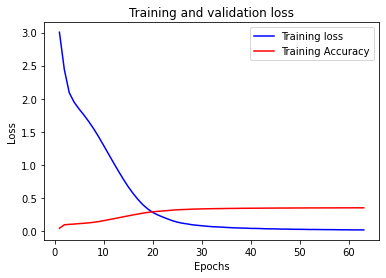

In [44]:
history_dict = history.history

acc = history_dict['accuracy']
loss = history_dict['loss']

his_epochs = range(1, len(loss) + 1)

plt.plot(his_epochs, loss, 'b', label='Training loss')
plt.plot(his_epochs, acc, 'r', label='Training Accuracy')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

- 두 그래프 모두 loss는 우하향, accuracy는 우상향하는 모습을 보여주나 그래프의 크기가 너무 커 accuracy가 제대로 안보이는군요.
- accuracy만 따로 그려보겠습니다.

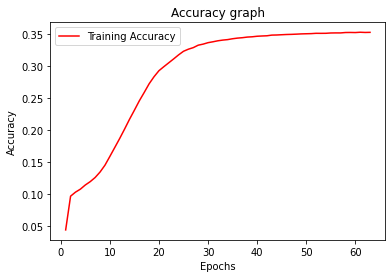

In [45]:
plt.plot(his_epochs, acc, 'r', label='Training Accuracy')
plt.title('Accuracy graph')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

- 확실하게 우상향하는 모습을 보여주는군요

In [46]:
def decoder_inference(sentence):
  sentence = preprocessing(sentence)

  # 입력된 문장을 정수 인코딩 후, 시작 토큰과 종료 토큰을 앞뒤로 추가.
  # ex) Where have you been? → [[8331   86   30    5 1059    7 8332]]
  sentence = tf.expand_dims(
      START_TOKEN + tokenizer.encode(sentence) + END_TOKEN, axis=0)

  # 디코더의 현재까지의 예측한 출력 시퀀스가 지속적으로 저장되는 변수.
  # 처음에는 예측한 내용이 없음으로 시작 토큰만 별도 저장. ex) 8331
  output_sequence = tf.expand_dims(START_TOKEN, 0)

  # 디코더의 인퍼런스 단계
  for i in range(MAX_LENGTH):
    # 디코더는 최대 MAX_LENGTH의 길이만큼 다음 단어 예측을 반복합니다.
    predictions = model(inputs=[sentence, output_sequence], training=False)
    predictions = predictions[:, -1:, :]

    # 현재 예측한 단어의 정수
    predicted_id = tf.cast(tf.argmax(predictions, axis=-1), tf.int32)

    # 만약 현재 예측한 단어가 종료 토큰이라면 for문을 종료
    if tf.equal(predicted_id, END_TOKEN[0]):
      break

    # 예측한 단어들은 지속적으로 output_sequence에 추가됩니다.
    # 이 output_sequence는 다시 디코더의 입력이 됩니다.
    output_sequence = tf.concat([output_sequence, predicted_id], axis=-1)

  return tf.squeeze(output_sequence, axis=0)

In [47]:
def sentence_generation(sentence):
  # 입력 문장에 대해서 디코더를 동작 시켜 예측된 정수 시퀀스를 리턴받습니다.
  prediction = decoder_inference(sentence)

  # 정수 시퀀스를 다시 텍스트 시퀀스로 변환합니다.
  predicted_sentence = tokenizer.decode(
      [i for i in prediction if i < tokenizer.vocab_size])

  print('입력 : {}'.format(sentence))
  print('출력 : {}'.format(predicted_sentence))

  return predicted_sentence

- 문장을 넣으면 답변 해주는 함수를 만들었습니다.
- 한번 학습 결과를 살펴보겠습니다.

In [48]:
sentence_generation('안녕?')

입력 : 안녕?
출력 : 안녕하세요.


'안녕하세요.'

In [52]:
sentence_generation('메뉴 추천해줘')

입력 : 메뉴 추천해줘
출력 : 냉장고 파먹기 해보세요.


'냉장고 파먹기 해보세요.'

In [53]:
sentence_generation('오늘 날씨 어때?')

입력 : 오늘 날씨 어때?
출력 : 날씨 어플에 물어보세요.


'날씨 어플에 물어보세요.'

In [59]:
sentence_generation('내일 면접있는데 잘 볼 수 있을까?')

입력 : 내일 면접있는데 잘 볼 수 있을까?
출력 : 끝까지 잘할 수 있을 거예요.


'끝까지 잘할 수 있을 거예요.'

In [62]:
sentence_generation('짜증나')

입력 : 짜증나
출력 : 짜증날 때는 기분 푸는 음악 어때요?


'짜증날 때는 기분 푸는 음악 어때요?'

- accuracy가 0.35밖에 안나와서 잘 안될줄 알았더니 생각보다 아주 좋은 모습을 보여주는군요.
- 학습이 잘 된것같습니다.

---
## 6. 회고

### 이번 프로젝트를 하면서 어려웠던 점
>- 이번 프로젝트는 매우 어려웠습니다. 애초부터 설정하는 함수들이 너무 많았고 새로운 모듈들을 너무 많이 사용해 모든것을 다 공부하기엔 시간적으로 너무 부족하여 모든걸 다 이해하지 못해서 학습하는 과정에서 어떻게 해야 성능개선이 좀 더 이루어질지 어떤 파라미터를 사용해야할지 도저히 건들 수가 없었습니다.
### 이번 프로젝트에서 학습한 내용
>- 이번 프로젝트에서는 tensorflow에 대해서 조금 더 공부한듯합니다. 지금까지 모르던 tensorflow의 모듈들을 많이 사용하게 되었고 그 과정에서 자세하고 사용법까지는 습득하지 못했지만 어떤 모듈이 어떤 라이브러리에 있다는 정도는 이제 알 듯 싶습니다.
### 알아낸 점이나 모호한 점
>- 위에서 말했듯이 새로운 모듈, 라이브러리들에 대해서 공부했지만 여전히 어느정도 감만 잡았을 뿐 사용법이나 구체적인 부분에 대해서는 아직까진 모호합니다.
### 루브릭 평가지표를 맞추기 위해 노력했던 점
>- __1. 공백과 특수문자 처리, 토크나이징, 병렬데이터 구축의 과정이 적절히 진행되었다.__ 에 관하여서는 `목차 2번 데이터 전처리하기` 에서 처리하였고 결과를 확인했습니다.
>- __2. 구현한 트랜스포머 모델이 한국어 병렬 데이터 학습 시 안정적으로 수렴하였다.__ 에 대해서는 학습은 무사히 진행되었으며 큰 문제없이 학습되었습니다.
>- __3. 한국어 입력문장에 맥락에 맞는 한국어로 답변을 리턴하였다.__ 는 답변을 생각보다 아주 잘 해주었으며 약간 느낌은 파악하지 못할지라도 질문과 같은 맥락의 답변을 해주었습니다.
### 루브릭 평가지표를 달성하지 못했다면 이유
>- 이번엔 솔직히 1,2,3번에 대해 모두 달성했다고 생각합니다. 딱히 문제 있는 부분이 없었고 잘 학습되었습니다.

---
## 7. Reference

- https://colab.research.google.com/drive/1FfhWsP9izQcuVl06P30r5cCxELA1ciVE?usp=sharing 한국어 전처리 참고
- https://ebbnflow.tistory.com/246 한국어 자연어 처리 기법 블로그
- https://wikidocs.net/92961 한국어 전처리 패키지

---
## 8. 자기다짐 및 아쉬운 점

- 이번 프로젝트는 상당히 어려웠습니다. 앞으로 많이 사용하게될 트랜스포머인데.. 잘 못알아가는게 너무나도 아쉽습니다. 
  
  
- 이제 방학인데 좀 더 공부해서 방학 후에는 더욱 자기주도형으로 할 수 있도록 해야겠습니다.